In [6]:
pip install pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

# Load the data
data = pd.read_excel(r'D:\Unemployment in India.xlsx')

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values if necessary
data = data.dropna()



           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
4  Andhra Pradesh  30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  
Region                                     14
Date                                       14
Frequency          

C:\Users\ronip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


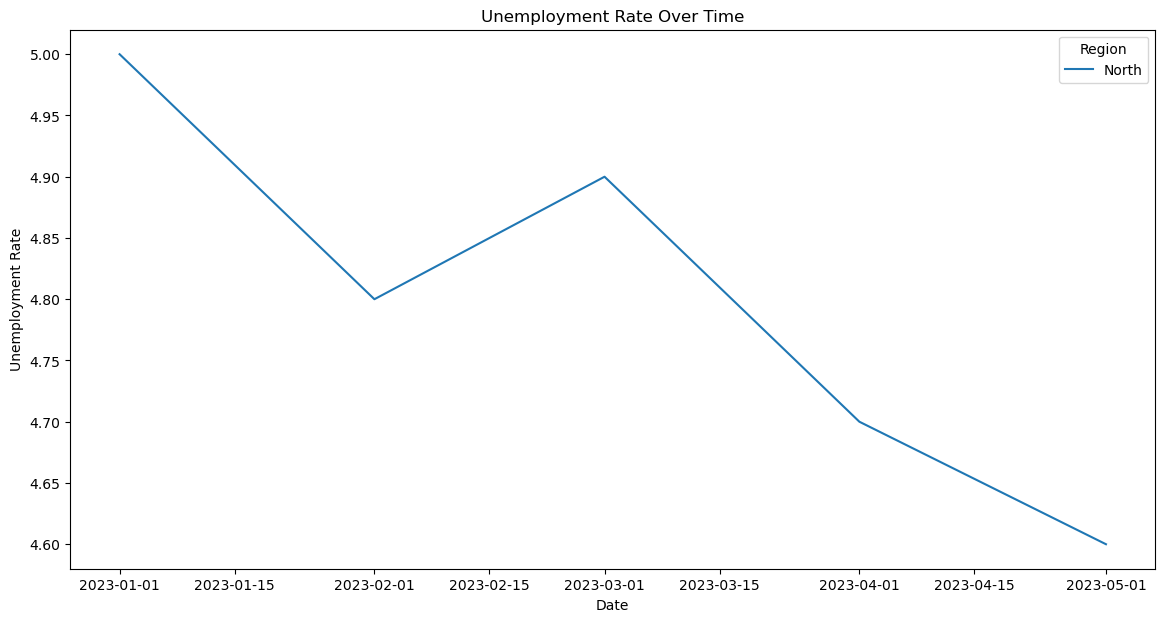

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.DataFrame({
    'Date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
    'Unemployment_Rate': [5.0, 4.8, 4.9, 4.7, 4.6],
    'Region': ['North', 'North', 'North', 'North', 'North']
})

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Plot unemployment rate over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Date', y='Unemployment_Rate', hue='Region')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.show()



C:\Users\ronip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


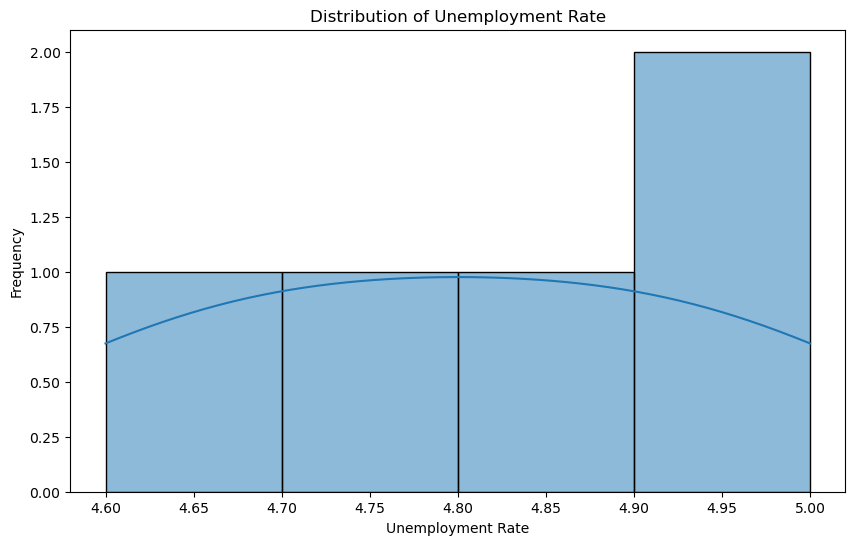

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.DataFrame({
    'Date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
    'Unemployment_Rate': [5.0, 4.8, 4.9, 4.7, 4.6],
    'Region': ['North', 'North', 'North', 'North', 'North']
})

# Plot the distribution of the unemployment rate
plt.figure(figsize=(10, 6))
sns.histplot(data['Unemployment_Rate'], kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()


In [17]:
# Summary statistics
print(data['Unemployment_Rate'].describe())


count    5.000000
mean     4.800000
std      0.158114
min      4.600000
25%      4.700000
50%      4.800000
75%      4.900000
max      5.000000
Name: Unemployment_Rate, dtype: float64


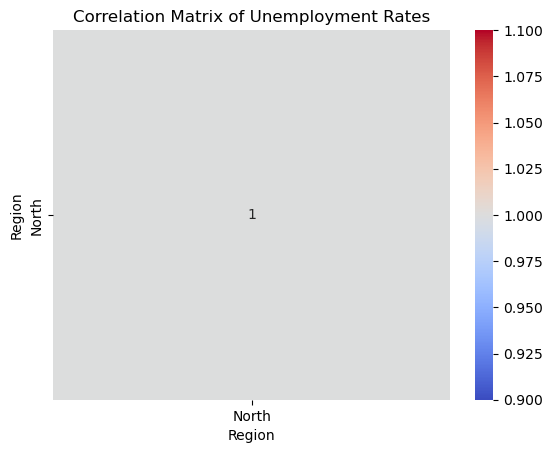

In [18]:
# Correlation matrix
correlation_matrix = data.pivot_table(index='Date', columns='Region', values='Unemployment_Rate').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Unemployment Rates')
plt.show()


Mean Squared Error: 0.0
R-squared: nan


C:\Users\ronip\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


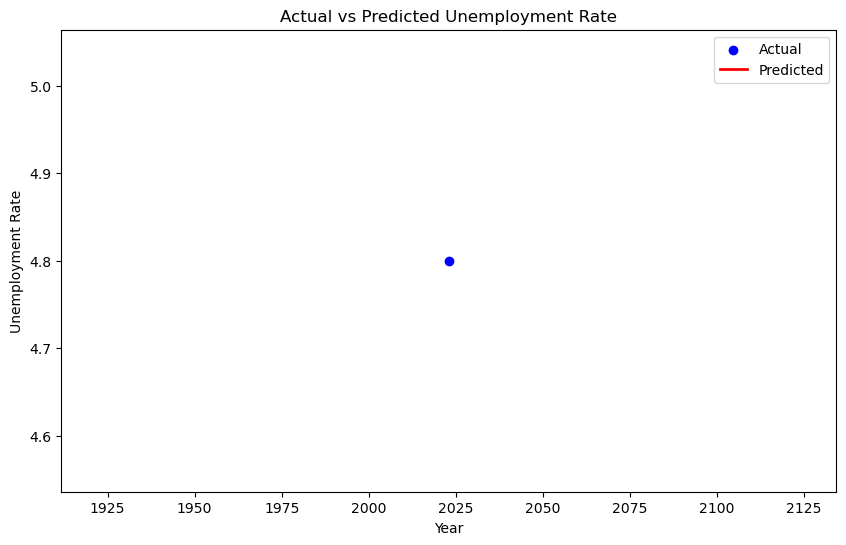

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Prepare the data
X = data[['Year']]
y = data['Unemployment_Rate']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()
